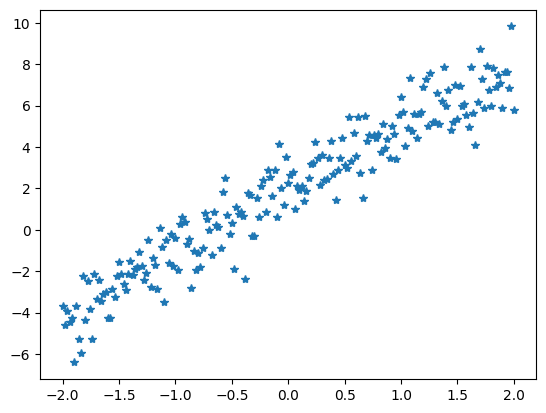

In [46]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest` LIMIT 150
    """
)

result = query_job.result()

tensor = []

for row in result:
    tensor.append(json.loads(row.positions_member))

# print(tensor)

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
candidate = df.pop('database')

df.head()


,codeLanguage,softwares,jobTitle,skills
1,React,,Project manager,"[,]"
2,React,,UX Designer,"[,]"
3,React,,Developer front-end,"[,]"
4,React,,Developer back-end,"[,]"
5,React,,Quality Assurance Engineer,"[,]"


In [2]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 150
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,None,None,None,None,None,None,None,BRL,24,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,15.000000000,13.000000000,13.000000000,13.000000000,72.000000000,18.000000000,None,USD,35,...,80.000000000,100.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
3,None,19.000000000,12.000000000,17.000000000,13.000000000,79.000000000,18.000000000,None,BRL,75,...,100.000000000,100.000000000,80.000000000,60.000000000,100.000000000,80.000000000,80.000000000,40.000000000,60.000000000,80.000000000
4,None,17.000000000,13.000000000,17.000000000,13.000000000,78.000000000,18.000000000,None,BRL,64,...,60.000000000,80.000000000,80.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000


In [3]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,None,None,None,None,None,None,None,24,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,15.000000000,13.000000000,13.000000000,13.000000000,72.000000000,18.000000000,None,35,2.000000000,...,80.000000000,100.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
3,None,19.000000000,12.000000000,17.000000000,13.000000000,79.000000000,18.000000000,None,75,4.000000000,...,100.000000000,100.000000000,80.000000000,60.000000000,100.000000000,80.000000000,80.000000000,40.000000000,60.000000000,80.000000000
4,None,17.000000000,13.000000000,17.000000000,13.000000000,78.000000000,18.000000000,None,64,1.000000000,...,60.000000000,80.000000000,80.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000


In [9]:
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,copywriter,Júnior,Full-time
1,Noe,Noe,Noe,Noe
2,USD,,Sênior,Full-time
3,BRL,developer back-end,sênior,full-time
4,BRL,,Júnior,Full-time


In [13]:
# strData.fillna("Noe", inplace=True)
strData['experience_workAvailability'] = pd.get_dummies(strData['experience_workAvailability'], dtype=int)
strData.head()

ValueError: Columns must be same length as key

In [6]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce')
ks = pd.concat([ks, strData], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary,personal_resume,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,Noe,Noe,,Júnior,Part-time
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,"Estudo e trabalho com programação desde 2020, ...",Noe,,Júnior,Hora
2,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,,Noe,Noe,,Noe
3,0,18,12,19,16,84,19,0,0.0,25,...,100,100,40,100,100,Noe,Noe,business development representative,Expert,Full-time
4,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,Noe,Noe,,Noe,Noe


In [13]:
f = ks.to_dict().values()
for key in f:
    print(type(key), key)

# df.head(80)

<class 'dict'> {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0

In [10]:
df.replace( '', 'a', inplace=True)
ks.replace('', 0, inplace=True)

In [11]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((df.to_dict().values(), ks.to_dict().values()))

for feat, targ in dataset.take(20):
    print('Feature: {}, target: {}'.format(feat, targ))


TypeError: Could not build a `TypeSpec` for [{1: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 2: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 3: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 4: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 5: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 7: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 9: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 10: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 12: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 13: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 14: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 16: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 18: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 20: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 22: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 23: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 24: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 26: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 28: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 30: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 32: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 34: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 35: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 37: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 38: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 39: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 40: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 41: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 43: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 44: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 45: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 46: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 47: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 48: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 50: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 52: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 53: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 54: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 55: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 57: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 59: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 61: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 63: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 64: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 65: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 66: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 68: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 70: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 71: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 72: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 73: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 74: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 76: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 78: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 79: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 80: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 81: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 83: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 85: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 87: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 89: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 91: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 92: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 93: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 94: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 96: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 97: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 99: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 101: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 102: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 104: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 106: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 107: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 108: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 109: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 111: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 113: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 115: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 116: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 118: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 119: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 121: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 122: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 123: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 125: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 126: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 127: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 128: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 130: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 131: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 132: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 133: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 135: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 136: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 137: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 138: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 140: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 141: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 142: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 143: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 145: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 146: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 147: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>, 148: <tf.Tensor: shape=(), dtype=string, numpy=b'React'>}, {1: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 2: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 3: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 4: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 5: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 7: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 9: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 10: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 12: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 13: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 14: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 16: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 18: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 20: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 22: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 23: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 24: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 26: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 28: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 30: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 32: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 34: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 35: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 37: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 38: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 39: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 40: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 41: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 43: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 44: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 45: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 46: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 47: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 48: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 50: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 52: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 53: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 54: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 55: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 57: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 59: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 61: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 63: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 64: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 65: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 66: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 68: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 70: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 71: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 72: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 73: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 74: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 76: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 78: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 79: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 80: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 81: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 83: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 85: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 87: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 89: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 91: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 92: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 93: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 94: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 96: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 97: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 99: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 101: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 102: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 104: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 106: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 107: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 108: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 109: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 111: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 113: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 115: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 116: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 118: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 119: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 121: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 122: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 123: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 125: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 126: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 127: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 128: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 130: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 131: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 132: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 133: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 135: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 136: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 137: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 138: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 140: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 141: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 142: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 143: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 145: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 146: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 147: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>, 148: <tf.Tensor: shape=(), dtype=string, numpy=b'a'>}, {1: <tf.Tensor: shape=(), dtype=string, numpy=b'Project manager'>, 2: <tf.Tensor: shape=(), dtype=string, numpy=b'UX Designer'>, 3: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 4: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 5: <tf.Tensor: shape=(), dtype=string, numpy=b'Quality Assurance Engineer'>, 7: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 9: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 10: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 12: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 13: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 14: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 16: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 18: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 20: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 22: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 23: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 24: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 26: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 28: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 30: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 32: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 34: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer mobile'>, 35: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 37: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 38: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 39: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 40: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 41: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 43: <tf.Tensor: shape=(), dtype=string, numpy=b'Software engineer'>, 44: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 45: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 46: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 47: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 48: <tf.Tensor: shape=(), dtype=string, numpy=b'Agile coach'>, 50: <tf.Tensor: shape=(), dtype=string, numpy=b'DevOps engineer'>, 52: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 53: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 54: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 55: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 57: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 59: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 61: <tf.Tensor: shape=(), dtype=string, numpy=b'Software engineer'>, 63: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 64: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 65: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 66: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 68: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 70: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 71: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 72: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 73: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 74: <tf.Tensor: shape=(), dtype=string, numpy=b'Software engineer'>, 76: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 78: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 79: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 80: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 81: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 83: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 85: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 87: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 89: <tf.Tensor: shape=(), dtype=string, numpy=b'Data engineer'>, 91: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 92: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 93: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 94: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 96: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 97: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 99: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 101: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 102: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 104: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 106: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 107: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 108: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 109: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 111: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 113: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer full-stack'>, 115: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 116: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 118: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 119: <tf.Tensor: shape=(), dtype=string, numpy=b'Software engineer'>, 121: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 122: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 123: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 125: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 126: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 127: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 128: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 130: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 131: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 132: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 133: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 135: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 136: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 137: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 138: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 140: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 141: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 142: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 143: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>, 145: <tf.Tensor: shape=(), dtype=string, numpy=b'Product owner'>, 146: <tf.Tensor: shape=(), dtype=string, numpy=b'UX / UI Designer'>, 147: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer front-end'>, 148: <tf.Tensor: shape=(), dtype=string, numpy=b'Developer back-end'>}, {1: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 2: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 3: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 4: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 5: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 7: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 9: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 10: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 12: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 13: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 14: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 16: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 18: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 20: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 22: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 23: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 24: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 26: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 28: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 30: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 32: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 34: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 35: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 37: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 38: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 39: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 40: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 41: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 43: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 44: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 45: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 46: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 47: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 48: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 50: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 52: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 53: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 54: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 55: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 57: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 59: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 61: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 63: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 64: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 65: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 66: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 68: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 70: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 71: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 72: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 73: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 74: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 76: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 78: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 79: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 80: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 81: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 83: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 85: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 87: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 89: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 91: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 92: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 93: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 94: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 96: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 97: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 99: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 101: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 102: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 104: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 106: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 107: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 108: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 109: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 111: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 113: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 115: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 116: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 118: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 119: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 121: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 122: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 123: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 125: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 126: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 127: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 128: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 130: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 131: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 132: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 133: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 135: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 136: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 137: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 138: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 140: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 141: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 142: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 143: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 145: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 146: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 147: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>, 148: <tf.Tensor: shape=(), dtype=string, numpy=b'[,]'>}] with type list